In [1]:
#1 FULLY CONNECTED NEURAL NETWORK FOR CLASSIFICATION OF WHEAT SEED DATASET
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import math

Using TensorFlow backend.


In [2]:
df=pd.read_csv(r'C:\Users\Niketa Mittal\Downloads\seeds_dataset1.csv')
df.head()

,Area,Perimeter,Compactness,Length_Kernal,Width_Kernal,AsymmetryCoefficient,Length_KernalGroove,Category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
X=df.iloc[:,0:7]
Y=df.iloc[:,7]

In [4]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=0)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [5]:
from keras.utils import to_categorical
y_binary = to_categorical(Y_train)
model=Sequential()
model.add(Dense(12,input_dim=7,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_binary,epochs=50,batch_size=10)
y_pred=model.predict(X_test)

Epoch 1/50
168/168 [==============================] - 1s 4ms/step - loss: 1.2406 - accuracy: 0.3214
Epoch 2/50
168/168 [==============================] - 0s 177us/step - loss: 1.0588 - accuracy: 0.3988
Epoch 3/50
168/168 [==============================] - 0s 126us/step - loss: 0.9098 - accuracy: 0.5595
Epoch 4/50
168/168 [==============================] - 0s 157us/step - loss: 0.7950 - accuracy: 0.6488
Epoch 5/50
168/168 [==============================] - 0s 175us/step - loss: 0.7058 - accuracy: 0.7024
Epoch 6/50
168/168 [==============================] - 0s 121us/step - loss: 0.6357 - accuracy: 0.7857
Epoch 7/50
168/168 [==============================] - 0s 171us/step - loss: 0.5793 - accuracy: 0.8571
Epoch 8/50
168/168 [==============================] - 0s 156us/step - loss: 0.5325 - accuracy: 0.8750
Epoch 9/50
168/168 [==============================] - 0s 128us/step - loss: 0.4909 - accuracy: 0.8810
Epoch 10/50
168/168 [==============================] - 0s 317us/step - loss: 0.4557 

In [6]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 2, 1, 1, 3, 2, 2, 2, 2, 3, 1, 3, 1, 3, 2, 2, 3, 1, 1, 1, 3, 1,
       1, 1, 2, 2, 2, 1, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 1, 1, 3, 1],
      dtype=int64)

In [7]:
print(np.floor(y_pred))
y_pred=np.floor(y_pred)

[1. 2. 1. 1. 3. 2. 2. 2. 2. 3. 1. 3. 1. 3. 2. 2. 3. 1. 1. 1. 3. 1. 1. 1.
 2. 2. 2. 1. 3. 3. 2. 3. 2. 2. 3. 3. 3. 2. 1. 1. 3. 1.]


In [8]:
cm=confusion_matrix(Y_test,y_pred)
cm

array([[13,  0,  0],
       [ 2, 14,  0],
       [ 0,  0, 13]], dtype=int64)

In [9]:
ac=accuracy_score(Y_test,y_pred)
ac

0.9523809523809523

In [10]:
from sklearn.metrics import f1_score
f1_score(Y_test,y_pred,average='weighted')

0.9524943310657596

In [11]:
#2 CNN ON CIFAR-10 DATASET
import pickle
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder
from keras.utils import np_utils

In [12]:
def load_data(path,i):
    with open(path+'\data_batch_'+str(i), 'rb') as file:
        batch=pickle.load(file, encoding='bytes')
        label_key=list(batch.keys())[1]
        data_key=list(batch.keys())[2]
        features=batch[data_key].reshape((batch[data_key].shape[0]),3,32,32).transpose(0,2,3,1)
        labels=batch[label_key]
    return features,labels

In [13]:
def load_test(path):
    with open(path+'\\test_batch', 'rb') as file:
        batch=pickle.load(file, encoding='bytes')
        label_key=list(batch.keys())[1]
        data_key=list(batch.keys())[2]
        features=batch[data_key].reshape((len(batch[data_key]),3,32,32)).transpose(0,2,3,1)
        labels=batch[label_key]
    return features,labels

In [14]:
def normal(x):
    min_val=np.min(x)
    max_val=np.max(x)
    x=(x-min_val)/(max_val-min_val)
    return x

In [15]:
batches=5
path=r'C:\Users\Niketa Mittal\Downloads\CIFAR'
valid_features=[]
valid_labels=[]
for i in range(1,6):
    features,labels=load_data(path,i)
    index=int(len(features))
    features=normal(features[0:index])
    labels=np_utils.to_categorical(labels)
    pickle.dump((features,labels),open(path+'\pre_batch_'+str(i)+'.p','wb'))
    valid_features.extend(features[-index:])
    valid_labels.extend(labels[-index:])
    print(np.shape(valid_features))

(10000, 32, 32, 3)
(20000, 32, 32, 3)
(30000, 32, 32, 3)
(40000, 32, 32, 3)
(50000, 32, 32, 3)


In [16]:
valid_features=normal(np.array(valid_features))
valid_labels=np.array(valid_labels)
print(valid_features.shape)
print(valid_labels.shape)

(50000, 32, 32, 3)
(50000, 10)


In [17]:
features_test=[]
labels_test=[]
features,labels=load_test(path)
index=int(len(features))
features=normal(features[0:index])
labels=np_utils.to_categorical(labels)
features_test.extend(features[-index:])
labels_test.extend(labels[-index:])
features_test=normal(np.array(features_test))
labels_test=np.array(labels_test)
labels_test
print(features_test.shape)
print(labels_test.shape)

(10000, 32, 32, 3)
(10000, 10)


In [18]:
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [19]:
n=valid_labels.shape[1]
print(n)
def base_model():
    model=Sequential()
    model.add(Conv2D(32,(3,3),padding='same',input_shape=valid_features.shape[1:],activation='relu'))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n,activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    print(model.summary())
    return model

10


In [20]:
model=base_model()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

In [21]:
model.fit(valid_features,valid_labels,epochs=10,batch_size=500)

Epoch 1/10
50000/50000 [==============================] - 230s 5ms/step - loss: 1.8029 - accuracy: 0.3391
Epoch 2/10
50000/50000 [==============================] - 225s 5ms/step - loss: 1.4017 - accuracy: 0.4930
Epoch 3/10
50000/50000 [==============================] - 226s 5ms/step - loss: 1.2348 - accuracy: 0.5593
Epoch 4/10
50000/50000 [==============================] - 209s 4ms/step - loss: 1.1079 - accuracy: 0.6091
Epoch 5/10
50000/50000 [==============================] - 195s 4ms/step - loss: 1.0015 - accuracy: 0.6478
Epoch 6/10
50000/50000 [==============================] - 193s 4ms/step - loss: 0.9302 - accuracy: 0.6733
Epoch 7/10
50000/50000 [==============================] - 192s 4ms/step - loss: 0.8756 - accuracy: 0.6940
Epoch 8/10
50000/50000 [==============================] - 192s 4ms/step - loss: 0.8175 - accuracy: 0.7124
Epoch 9/10
50000/50000 [==============================] - 192s 4ms/step - loss: 0.7734 - accuracy: 0.7289
Epoch 10/10
50000/50000 [=====================

In [22]:
labels_pred=model.predict(features_test)

In [23]:
labels_pred.shape

(10000, 10)

In [24]:
from sklearn.metrics import r2_score
rscore=r2_score(labels_test,labels_pred)
rscore

0.6154494705294976

In [25]:
#3RNN FOR IMAGE TITLE GENERATION


In [26]:
#4 RNN FOR SENTIMENT ANALYSIS
import re
import nltk
from nltk.corpus import stopwords
from keras.preprocessing.text import one_hot, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling2D,LSTM
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [27]:
df=pd.read_csv(r'C:\Users\Niketa Mittal\Downloads\IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [28]:
le=LabelEncoder()
df["sentiment"]=le.fit_transform(df["sentiment"])
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [29]:
re_comp=re.compile(r'<[^>]+>')
for i in range(0,df.shape[0]):
    df["review"][i]=re_comp.sub('',df["review"][i])
    df["review"][i]=re.sub('[^a-zA-Z]',' ',df["review"][i])
    df["review"][i]=re.sub(r"\s+[a-zA-Z]\s+",' ',df["review"][i])
    df["review"][i]=re.sub(r'\s+',' ',df["review"][i])
df.head()

C:\Users\Niketa Mittal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Niketa Mittal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Niketa Mittal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production The filming tech...,1
2,I thought this was wonderful way to spend time...,1
3,Basically there a family where little boy Jake...,0
4,Petter Mattei Love in the Time of Money is vis...,1


In [30]:
X=[]
sent=list(df["review"])
for sen in sent:
    X.append(sen)
X[100]

'This short film that inspired the soon to be full length feature Spatula Madness is hilarious piece that contends against similar cartoons yielding multiple writers The short film stars Edward the Spatula who after being fired from his job joins in the fight against the evil spoons This premise allows for some funny content near the beginning but is barely present for the remainder of the feature This film minute running time is absorbed by some odd ball comedy and small musical number Unfortunately not much else lies below it The plot that is set up doesn really have time to show But it surely follows it plot better than many high budget Hollywood films This film is worth watching at least few times Take it for what it is and don expect deep story '

In [31]:
y=df["sentiment"]
y[100]

1

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)
token=Tokenizer(num_words=5000)
token.fit_on_texts(X_train)
X_train=token.texts_to_sequences(X_train)
X_test=token.texts_to_sequences(X_test)

In [33]:
len(X_train[100])

143

In [34]:
max_words=500
X_train=pad_sequences(X_train,maxlen=max_words)
X_test=pad_sequences(X_test,maxlen=max_words)

In [35]:
embedding_size=32
vocab_size=5000
model=Sequential()
model.add(Embedding(vocab_size,embedding_size,input_length=max_words))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
batch_count=64
epoch_count=3
X_valid,y_valid=X_train[:batch_count],y_train[:batch_count]
X_train2,y_train2=X_train[batch_count:],y_train[batch_count:]
model.fit(X_train2,y_train2,validation_data=(X_valid,y_valid),batch_size=batch_count,epochs=epoch_count)

Train on 39936 samples, validate on 64 samples
Epoch 1/3
39936/39936 [==============================] - 546s 14ms/step - loss: 0.2140 - accuracy: 0.9179 - val_loss: 0.2285 - val_accuracy: 0.9219
Epoch 2/3
39936/39936 [==============================] - 544s 14ms/step - loss: 0.1887 - accuracy: 0.9284 - val_loss: 0.2099 - val_accuracy: 0.9219
Epoch 3/3
39936/39936 [==============================] - 548s 14ms/step - loss: 0.1691 - accuracy: 0.9358 - val_loss: 0.2109 - val_accuracy: 0.9375


In [39]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
scores=model.evaluate(X_test,y_test,verbose=0)
print("accuracy:",scores[1])

accuracy: 0.8802000284194946


In [41]:
#5 SLP AND MLP TO BUILD LOGIC GATES
from math import exp
#AND GATE
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
    p= 1.0 / (1.0 + exp(-activation))
    return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

# test forward propagation
network = [[{'weights': [20, 20, -30]}]]
row = [1, 1, None]
output = forward_propagate(network, row)
print(1, 1, output)
row = [1, 0, None]
output = forward_propagate(network, row)
print(1, 0, output)
row = [0, 1, None]
output = forward_propagate(network, row)
print(0, 1, output)
row = [0, 0, None]
output = forward_propagate(network, row)
print(0, 0, output)


1 1 [0.9999546021312976]
1 0 [4.5397868702434395e-05]
0 1 [4.5397868702434395e-05]
0 0 [9.357622968839299e-14]


In [42]:
# Example of forward propagating input
from math import exp
#OR GATE
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
    p= 1.0 / (1.0 + exp(-activation))
    return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

# test forward propagation
network = [[{'weights': [20, 20, -10]}]]
row = [1, 1, None]
output = forward_propagate(network, row)
print(1, 1, output)
row = [1, 0, None]
output = forward_propagate(network, row)
print(1, 0, output)
row = [0, 1, None]
output = forward_propagate(network, row)
print(0, 1, output)
row = [0, 0, None]
output = forward_propagate(network, row)
print(0, 0, output)


1 1 [0.9999999999999065]
1 0 [0.9999546021312976]
0 1 [0.9999546021312976]
0 0 [4.5397868702434395e-05]


In [43]:
# Example of forward propagating input
from math import exp
#NOT GATE
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
    p= 1.0 / (1.0 + exp(-activation))
    return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

# test forward propagation
network = [[{'weights': [-20, 10]}]]
row = [1, None]
output = forward_propagate(network, row)
print(1, output)
row = [0, None]
output = forward_propagate(network, row)
print(0, output)


1 [4.5397868702434395e-05]
0 [0.9999546021312976]


In [44]:
#6 REGRESSION USING ANN ON BOSTON HOUSING DATASET
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold,train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
df=pd.read_csv(r'C:\Users\Niketa Mittal\Downloads\HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [47]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [48]:
X=df.iloc[:,0:13]
y=df.iloc[:,13]
X.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
dtype: int64

In [49]:
from sklearn.impute import KNNImputer
imp=KNNImputer(n_neighbors=2,weights='uniform')
X_new=pd.DataFrame(imp.fit_transform(X),columns=X.columns)
X_new.isna().sum()
print(X_new.shape)
y.shape

(506, 13)


(506,)

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.2,random_state=0)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [51]:
model=Sequential()
model.add(Dense(128,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='linear'))
#opt=keras.optimizers.Adamax(learning_rate=0.01)
#model.compile(loss='mean_squared_error',optimizer=opt)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 166,657
Trainable params: 166,657
Non-trainable params: 0
_________________________________________________________________
None


In [52]:
model.fit(X_train,y_train,epochs=200,batch_size=50,validation_split=0.2)
y_pred=model.predict(X_test)

Train on 323 samples, validate on 81 samples
Epoch 1/200
323/323 [==============================] - 0s 576us/step - loss: 21.7291 - mean_absolute_error: 21.7291 - val_loss: 18.8108 - val_mean_absolute_error: 18.8108
Epoch 2/200
323/323 [==============================] - 0s 75us/step - loss: 15.4882 - mean_absolute_error: 15.4882 - val_loss: 8.3007 - val_mean_absolute_error: 8.3007
Epoch 3/200
323/323 [==============================] - 0s 74us/step - loss: 10.4293 - mean_absolute_error: 10.4293 - val_loss: 7.1616 - val_mean_absolute_error: 7.1616
Epoch 4/200
323/323 [==============================] - 0s 71us/step - loss: 6.1032 - mean_absolute_error: 6.1032 - val_loss: 5.1240 - val_mean_absolute_error: 5.1240
Epoch 5/200
323/323 [==============================] - 0s 105us/step - loss: 4.6226 - mean_absolute_error: 4.6226 - val_loss: 4.7162 - val_mean_absolute_error: 4.7162
Epoch 6/200
323/323 [==============================] - 0s 77us/step - loss: 3.7540 - mean_absolute_error: 3.7540 - 

Epoch 50/200
323/323 [==============================] - 0s 133us/step - loss: 1.3347 - mean_absolute_error: 1.3347 - val_loss: 2.0773 - val_mean_absolute_error: 2.0773
Epoch 51/200
323/323 [==============================] - 0s 139us/step - loss: 1.5440 - mean_absolute_error: 1.5440 - val_loss: 2.3987 - val_mean_absolute_error: 2.3987
Epoch 52/200
323/323 [==============================] - 0s 114us/step - loss: 1.8328 - mean_absolute_error: 1.8328 - val_loss: 2.5233 - val_mean_absolute_error: 2.5233
Epoch 53/200
323/323 [==============================] - 0s 130us/step - loss: 1.4968 - mean_absolute_error: 1.4968 - val_loss: 2.0188 - val_mean_absolute_error: 2.0188
Epoch 54/200
323/323 [==============================] - 0s 108us/step - loss: 1.3044 - mean_absolute_error: 1.3044 - val_loss: 2.2274 - val_mean_absolute_error: 2.2274
Epoch 55/200
323/323 [==============================] - 0s 108us/step - loss: 1.1453 - mean_absolute_error: 1.1453 - val_loss: 2.0707 - val_mean_absolute_error:

Epoch 99/200
323/323 [==============================] - 0s 175us/step - loss: 0.7724 - mean_absolute_error: 0.7724 - val_loss: 1.9852 - val_mean_absolute_error: 1.9852
Epoch 100/200
323/323 [==============================] - 0s 164us/step - loss: 0.7591 - mean_absolute_error: 0.7591 - val_loss: 1.9842 - val_mean_absolute_error: 1.9842
Epoch 101/200
323/323 [==============================] - 0s 204us/step - loss: 0.8831 - mean_absolute_error: 0.8831 - val_loss: 2.1640 - val_mean_absolute_error: 2.1640
Epoch 102/200
323/323 [==============================] - 0s 145us/step - loss: 1.0625 - mean_absolute_error: 1.0625 - val_loss: 1.9844 - val_mean_absolute_error: 1.9844
Epoch 103/200
323/323 [==============================] - 0s 167us/step - loss: 1.1356 - mean_absolute_error: 1.1356 - val_loss: 2.4328 - val_mean_absolute_error: 2.4328
Epoch 104/200
323/323 [==============================] - 0s 130us/step - loss: 1.3116 - mean_absolute_error: 1.3116 - val_loss: 2.1342 - val_mean_absolute_e

323/323 [==============================] - 0s 117us/step - loss: 0.6515 - mean_absolute_error: 0.6515 - val_loss: 1.9765 - val_mean_absolute_error: 1.9765
Epoch 148/200
323/323 [==============================] - 0s 86us/step - loss: 0.6255 - mean_absolute_error: 0.6255 - val_loss: 2.0835 - val_mean_absolute_error: 2.0835
Epoch 149/200
323/323 [==============================] - 0s 164us/step - loss: 0.5757 - mean_absolute_error: 0.5757 - val_loss: 1.9156 - val_mean_absolute_error: 1.9156
Epoch 150/200
323/323 [==============================] - 0s 127us/step - loss: 0.5000 - mean_absolute_error: 0.5000 - val_loss: 2.0578 - val_mean_absolute_error: 2.0578
Epoch 151/200
323/323 [==============================] - 0s 136us/step - loss: 0.5204 - mean_absolute_error: 0.5204 - val_loss: 1.9973 - val_mean_absolute_error: 1.9973
Epoch 152/200
323/323 [==============================] - 0s 111us/step - loss: 0.5698 - mean_absolute_error: 0.5698 - val_loss: 2.0142 - val_mean_absolute_error: 2.0142
E

323/323 [==============================] - 0s 133us/step - loss: 0.7561 - mean_absolute_error: 0.7561 - val_loss: 1.9356 - val_mean_absolute_error: 1.9356
Epoch 196/200
323/323 [==============================] - 0s 151us/step - loss: 0.7535 - mean_absolute_error: 0.7535 - val_loss: 1.9928 - val_mean_absolute_error: 1.9928
Epoch 197/200
323/323 [==============================] - 0s 139us/step - loss: 0.7965 - mean_absolute_error: 0.7965 - val_loss: 2.1678 - val_mean_absolute_error: 2.1678
Epoch 198/200
323/323 [==============================] - 0s 139us/step - loss: 0.6773 - mean_absolute_error: 0.6773 - val_loss: 2.0641 - val_mean_absolute_error: 2.0641
Epoch 199/200
323/323 [==============================] - 0s 136us/step - loss: 0.5425 - mean_absolute_error: 0.5425 - val_loss: 2.1203 - val_mean_absolute_error: 2.1203
Epoch 200/200
323/323 [==============================] - 0s 176us/step - loss: 0.6086 - mean_absolute_error: 0.6086 - val_loss: 1.9558 - val_mean_absolute_error: 1.9558


In [53]:
print(y_test)
y_pred

329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
       ... 
56     24.7
455    14.1
60     18.7
213    28.1
108    19.8
Name: MEDV, Length: 102, dtype: float64


array([[21.33612  ],
       [28.754948 ],
       [24.057434 ],
       [ 9.561113 ],
       [18.40374  ],
       [19.933754 ],
       [23.041004 ],
       [18.84572  ],
       [19.305538 ],
       [23.555191 ],
       [ 9.107792 ],
       [10.43639  ],
       [15.661044 ],
       [ 6.9549627],
       [38.921383 ],
       [35.395554 ],
       [23.801666 ],
       [37.822536 ],
       [28.700405 ],
       [20.1389   ],
       [22.812675 ],
       [19.092175 ],
       [19.58664  ],
       [26.607613 ],
       [21.10672  ],
       [21.850582 ],
       [17.067444 ],
       [16.437256 ],
       [40.604633 ],
       [18.23742  ],
       [14.472736 ],
       [16.687588 ],
       [18.912436 ],
       [18.08379  ],
       [29.879969 ],
       [23.006344 ],
       [ 9.013563 ],
       [39.003487 ],
       [13.015783 ],
       [16.79739  ],
       [23.312183 ],
       [21.269516 ],
       [17.791557 ],
       [19.168285 ],
       [20.864555 ],
       [28.746515 ],
       [19.682873 ],
       [20.95

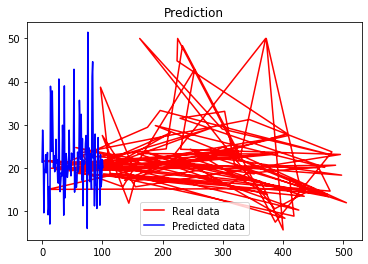

In [54]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()


In [55]:
from sklearn.metrics import r2_score
rscore=r2_score(y_test,y_pred)
rscore

0.7345444432503523